In [1]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style = "darkgrid")
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from decimal import Decimal
from collections import Counter

2022-11-25 23:44:52.112060: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_id_df = pd.read_csv("data/train_identity.csv")
train_trans_df = pd.read_csv("data/train_transaction.csv")

# EDA

In [3]:
print("ID dataset has shape = ", train_id_df.shape)
print("Transaction dataset has shape = ", train_trans_df.shape)

ID dataset has shape =  (144233, 41)
Transaction dataset has shape =  (590540, 394)


In [4]:
train_id_df.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_trans_df.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#All columns in transaction table
for i in train_trans_df.head(0):
    print(i)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

In [7]:
print(train_id_df.isnull().sum()/1442.33)

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

In [8]:
print(train_trans_df.isnull().sum()/5905.40)

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64


## Transaction type based on decimal spaces in TransactionAmt

In [9]:
def transaction_curr_assess(trans_amt):
    num_digits = abs(Decimal(str(trans_amt)).as_tuple().exponent)
    
    if num_digits <= 2:
        return "local"
    else:
        return "foreign"

In [10]:
train_trans_df["Transaction_curr_type"] = train_trans_df["TransactionAmt"].apply(transaction_curr_assess)

In [11]:
train_trans_df.sample(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,Transaction_curr_type
198034,3185034,0,4478263,35.95,W,1701,383.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
522585,3509585,0,13726954,107.95,W,6019,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
528573,3515573,0,13903171,77.00,W,7585,553.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
509725,3496725,0,13357629,57.95,W,2969,532.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
509369,3496369,0,13351395,270.00,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
200495,3187495,0,4565453,49.00,W,7815,161.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
368074,3355074,0,9149005,107.95,W,12501,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
302673,3289673,0,7493473,57.95,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
14547,3001547,0,412328,226.00,W,3178,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local
25103,3012103,0,656385,30.00,W,9500,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,local


## EDA of Card1 - Card6 columns

In [12]:
card_df = train_trans_df[["TransactionID","isFraud","card1", "card2", "card3", "card4", "card5", "card6"]]
card_df

,TransactionID,isFraud,card1,card2,card3,card4,card5,card6
0,2987000,0,13926,NaN,150.0,discover,142.0,credit
1,2987001,0,2755,404.0,150.0,mastercard,102.0,credit
2,2987002,0,4663,490.0,150.0,visa,166.0,debit
3,2987003,0,18132,567.0,150.0,mastercard,117.0,debit
4,2987004,0,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...,...,...
590535,3577535,0,6550,NaN,150.0,visa,226.0,debit
590536,3577536,0,10444,225.0,150.0,mastercard,224.0,debit
590537,3577537,0,12037,595.0,150.0,mastercard,224.0,debit
590538,3577538,0,7826,481.0,150.0,mastercard,224.0,debit


In [13]:
for i in [1,2,3,5]:
    card_id = "card"+ str(i)
    print(card_id)
    print("minimum value:", train_trans_df[card_id].min())
    print("maximum value:", train_trans_df[card_id].max())


card1
minimum value: 1000
maximum value: 18396
card2
minimum value: 100.0
maximum value: 600.0
card3
minimum value: 100.0
maximum value: 231.0
card5
minimum value: 100.0
maximum value: 237.0


In [14]:
card_df_fraud = card_df[card_df["isFraud"]==1]
card_df_fraud.head()

,TransactionID,isFraud,card1,card2,card3,card4,card5,card6
203,2987203,1,18268,583.0,150.0,visa,226.0,credit
240,2987240,1,13413,103.0,185.0,visa,137.0,credit
243,2987243,1,13413,103.0,185.0,visa,137.0,credit
245,2987245,1,13413,103.0,185.0,visa,137.0,credit
288,2987288,1,16578,545.0,185.0,visa,226.0,credit


In [15]:
card_df_no_fraud = card_df[card_df["isFraud"]==0]
card_df_no_fraud.head()

,TransactionID,isFraud,card1,card2,card3,card4,card5,card6
0,2987000,0,13926,NaN,150.0,discover,142.0,credit
1,2987001,0,2755,404.0,150.0,mastercard,102.0,credit
2,2987002,0,4663,490.0,150.0,visa,166.0,debit
3,2987003,0,18132,567.0,150.0,mastercard,117.0,debit
4,2987004,0,4497,514.0,150.0,mastercard,102.0,credit


In [16]:
# Fraud counts
for i in ["card2"]:
    x = Counter(card_df_fraud[i])
    mc = x.most_common(15)
    print(i)
    print(mc)
    counter = []
    for i in mc:
        counter.append(i[1])
    print(sum(counter)*100/20663)
    print("-"*40)

card2
[(545.0, 1420), (321.0, 1396), (111.0, 978), (555.0, 959), (490.0, 916), (500.0, 911), (583.0, 899), (408.0, 673), (514.0, 672), (130.0, 657), (170.0, 570), (296.0, 483), (327.0, 452), (375.0, 438), (142.0, 405)]
57.247253544983785
----------------------------------------


In [17]:
# Non-Fraud counts
for i in ["card2"]:
    x = Counter(card_df_no_fraud[i])
    mc = x.most_common(15)
    print(i)
    print(mc)
    counter = []
    for i in mc:
        counter.append(i[1])
    print(sum(counter)*100/569877)
    print("-"*40)

card2
[(321.0, 47539), (111.0, 44213), (555.0, 41036), (490.0, 37229), (583.0, 20904), (170.0, 17644), (194.0, 16808), (360.0, 15032), (545.0, 14935), (514.0, 13869), (174.0, 11022), (512.0, 9926), (361.0, 7692), (100.0, 7473), (408.0, 7339)]
54.86464623067785
----------------------------------------


In [18]:
card_df_fraud.shape

(20663, 8)

In [19]:
card3_top_list = [150, 185, 106, 146, 144, 117, 143, 119, 102, 147, 223]
card5_top_list = [226, 224, 166, 102, 117, 138, 195, 126, 137, 219, 202, 162, 229, 197, 150, 223, 147]

In [20]:
def card3_toplist_assigner(value):
    card3_top_list = [150, 185, 106, 146, 144, 117, 143, 119, 102, 147, 223]
    if value == np.nan:
        return 0
    elif value in card3_top_list:
        return value
    else:
        return 0

In [21]:
def card5_toplist_assigner(value):
    card5_top_list = [226, 224, 166, 102, 117, 138, 195, 126, 137, 219, 202, 162, 229, 197, 150, 223, 147]
    if value == np.nan:
        return 0
    elif value in card5_top_list:
        return value
    else:
        return 0

In [22]:
train_trans_df["card3_proc"] = train_trans_df["card3"].apply(card3_toplist_assigner)
train_trans_df["card5_proc"] = train_trans_df["card5"].apply(card5_toplist_assigner)

Card1 = unknown, drop!

card2 is in the same range and order of magnitude as addr1 which is the column for billing region. Therefore, it might be card issue region

Card3 or card5 can be card issue country because there are 131, and 137 unique values which is the same order of mag as number of countries. 

Most common codes for card3 = [150, 185, 106, 146, 144, 117, 143, 119, 102, 147, 223] accounts for more than 99% of data. All other codes can be "dnk" (do not know).

Most common codes for card5 = [226, 224, 166, 102, 117, 138, 195, 126, 137, 219, 202, 162, 229, 197, 150, 223, 147]. These accounts for more than 97% of data. All other codes can be "dnk" (do not know).

## EDA on transaction DT, and function to assign Day-Type

In [23]:
print("min value: ",train_trans_df["TransactionDT"].min(), "seconds")
print("max value: ",train_trans_df["TransactionDT"].max(), "seconds")

min value:  86400 seconds
max value:  15811131 seconds


In [24]:
trans_dt_amt_df = train_trans_df[["TransactionDT", "TransactionAmt"]]
trans_dt_amt_df

,TransactionDT,TransactionAmt
0,86400,68.50
1,86401,29.00
2,86469,59.00
3,86499,50.00
4,86506,50.00
...,...,...
590535,15811047,49.00
590536,15811049,39.50
590537,15811079,30.95
590538,15811088,117.00


In [25]:
trans_dt_amt_df["TransactionDT_day"] = np.floor(trans_dt_amt_df["TransactionDT"]/86400)

In [26]:
trans_dt_amt_df

,TransactionDT,TransactionAmt,TransactionDT_day
0,86400,68.50,1.0
1,86401,29.00,1.0
2,86469,59.00,1.0
3,86499,50.00,1.0
4,86506,50.00,1.0
...,...,...,...
590535,15811047,49.00,182.0
590536,15811049,39.50,182.0
590537,15811079,30.95,182.0
590538,15811088,117.00,182.0


<AxesSubplot:xlabel='TransactionDT_day', ylabel='TransactionAmt'>

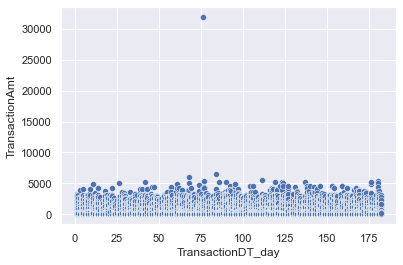

In [27]:
sns.scatterplot(data = trans_dt_amt_df, x = "TransactionDT_day", y = "TransactionAmt")

In [28]:
pivot_df = trans_dt_amt_df.groupby(["TransactionDT_day"], as_index = False).sum()
pivot_df

,TransactionDT_day,TransactionDT,TransactionAmt
0,1.0,719014326,742186.931
1,2.0,831269895,453400.013
2,3.0,1010824417,348517.434
3,4.0,1603947666,515968.997
4,5.0,1909539711,543140.641
...,...,...,...
177,178.0,31912358586,221811.808
178,179.0,33782896635,242488.951
179,180.0,40854783888,401072.075
180,181.0,42976178937,422578.544


<AxesSubplot:xlabel='TransactionDT_day', ylabel='TransactionAmt'>

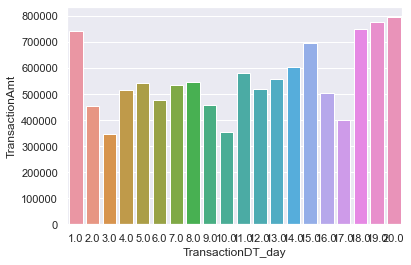

In [29]:
sns.barplot(data = pivot_df[0:20], x = "TransactionDT_day", y = "TransactionAmt")


Assuming that least amount of shopping happens on Tuesday, so we can see that our data starts on a Sunday

In [30]:
def weekend_assigner(transactionDT):
    """
    Sunday = 1, Monday = 2 etc.
    Saturday/Sunday = weekend, returns 1
    else = weekday, returns 0
    """
    day_number = np.floor(transactionDT/(60*60*24))
    if day_number <= 7:
        weekday = day_number
    else:
        weekday = (day_number%7)+1
    if weekday == 7 or weekday == 1:
        return 1
    else: 
        return 0
    

In [31]:
trans_dt_amt_df["weekend"] = trans_dt_amt_df["TransactionDT"].apply(weekend_assigner)

In [32]:
trans_dt_amt_df.sample(20)

,TransactionDT,TransactionAmt,TransactionDT_day,weekend
470463,12150324,32.970,140.0,1
127280,2519272,56.551,29.0,0
94642,1958511,200.000,22.0,0
307474,7655329,117.000,88.0,0
145916,3005697,141.000,34.0,1
246167,5859256,58.950,67.0,0
325741,8029336,33.654,92.0,0
417044,10531236,44.000,121.0,0
226034,5343488,42.950,61.0,0
488137,12706574,55.332,147.0,1


In [33]:
# applying weekend assessment to train dataset
train_trans_df["weekend"] = train_trans_df["TransactionDT"].apply(weekend_assigner)

In [34]:
train_trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V334,V335,V336,V337,V338,V339,Transaction_curr_type,card3_proc,card5_proc,weekend
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,0.0,1
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,102.0,1
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,166.0,1
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,117.0,1
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,local,150.0,102.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,226.0,1
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,224.0,1
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,224.0,1
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,local,150.0,224.0,1


## Converting transactionAmt to Log scale

In [35]:
train_trans_df["TransactionAmt_LOG"] = np.log(train_trans_df["TransactionAmt"])
train_trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V335,V336,V337,V338,V339,Transaction_curr_type,card3_proc,card5_proc,weekend,TransactionAmt_LOG
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,0.0,1,4.226834
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,102.0,1,3.367296
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,166.0,1,4.077537
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,117.0,1,3.912023
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,local,150.0,102.0,1,3.912023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,226.0,1,3.891820
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,224.0,1,3.676301
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,224.0,1,3.432373
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,local,150.0,224.0,1,4.762174


In [36]:
train_trans_df["TransactionAmt_LOG"].describe()

count    590540.000000
mean          4.363864
std           0.954037
min          -1.382302
25%           3.768638
50%           4.230753
75%           4.828314
max          10.371533
Name: TransactionAmt_LOG, dtype: float64

## EDA on addr1 and addr2 and dist

In [37]:
#addr1 is the billing region
print("min value of addr1: ", train_trans_df["addr1"].min())
print("max value of addr1: ", train_trans_df["addr1"].max())

min value of addr1:  100.0
max value of addr1:  540.0


In [38]:
#addr2 is the billing country
print("min value of addr2: ", train_trans_df["addr2"].min())
print("max value of addr2: ", train_trans_df["addr2"].max())

min value of addr2:  10.0
max value of addr2:  102.0


In [39]:
#distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.
print("min value of dist1: ", train_trans_df["dist1"].min())
print("max value of dist1: ", train_trans_df["dist1"].max())

min value of dist1:  0.0
max value of dist1:  10286.0


In [40]:
#distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.
print("min value of dist2: ", train_trans_df["dist2"].min())
print("max value of dist2: ", train_trans_df["dist2"].max())

min value of dist2:  0.0
max value of dist2:  11623.0


<AxesSubplot:>

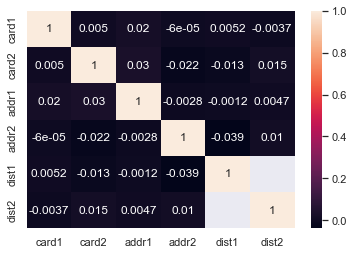

In [41]:
sns.heatmap(train_trans_df[["card1", "card2", "addr1","addr2", "dist1", "dist2"]].corr(), annot = True)

Nothing meaningful came from this. To pursue later...

## EDA on email domain for purchaser

In [42]:
train_trans_df["P_emaildomain"].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

THe .mx seems to be for an email exchange client. Could prove to have some value. THerefore splitting the email domains into parent company like "gmail"/"yahoo", and extention ".com", ".net", ".mx"

In [43]:
def email_splitter_company(email):
    return str(email).split(".")[0]

def email_splitter_ext(email):
    return str(email).split(".")[-1]


In [44]:
#apply function to purchaser emails in training dataset

train_trans_df["P_emaildomain_company"] = train_trans_df["P_emaildomain"].apply(email_splitter_company)

In [45]:
train_trans_df["P_emaildomain_ext"] = train_trans_df["P_emaildomain"].apply(email_splitter_ext)

In [46]:
train_trans_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V337,V338,V339,Transaction_curr_type,card3_proc,card5_proc,weekend,TransactionAmt_LOG,P_emaildomain_company,P_emaildomain_ext
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,local,150.0,0.0,1,4.226834,nan,nan
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,local,150.0,102.0,1,3.367296,gmail,com
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,local,150.0,166.0,1,4.077537,outlook,com
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,local,150.0,117.0,1,3.912023,yahoo,com
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,local,150.0,102.0,1,3.912023,gmail,com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,local,150.0,226.0,1,3.891820,nan,nan
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,local,150.0,224.0,1,3.676301,gmail,com
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,local,150.0,224.0,1,3.432373,gmail,com
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,local,150.0,224.0,1,4.762174,aol,com


## EDA on columns C1 - C14
These represent counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [47]:
c_cols = ["C"+str(i) for i in range(1,15)]
for i in c_cols:
    print(i)
    print(train_trans_df[i].value_counts())
    print("-"*50)

C1
1.0       316791
2.0       105071
3.0        51315
4.0        28845
5.0        17922
           ...  
3433.0         1
3434.0         1
3435.0         1
3436.0         1
1500.0         1
Name: C1, Length: 1657, dtype: int64
--------------------------------------------------
C2
1.0       316261
2.0       103948
3.0        51770
4.0        28251
5.0        16971
           ...  
1058.0         1
1057.0         1
1056.0         1
1055.0         1
1670.0         1
Name: C2, Length: 1216, dtype: int64
--------------------------------------------------
C3
0.0     588111
1.0       2137
2.0        180
3.0         58
4.0          7
16.0         6
9.0          5
11.0         5
5.0          3
13.0         3
14.0         3
7.0          2
17.0         2
15.0         2
12.0         2
10.0         2
8.0          2
18.0         1
19.0         1
20.0         1
21.0         1
22.0         1
23.0         1
24.0         1
25.0         1
6.0          1
26.0         1
Name: C3, dtype: int64
-------------

<AxesSubplot:>

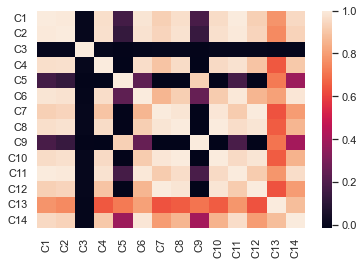

In [48]:
sns.heatmap((train_trans_df[c_cols].corr()))

C1 - C14 are masked and cannot be connected to any other columns. They are clearly counts of something but of what? Also, there are alot of colinearities between these features. 

Maybe there are hidden patterns for counts for fraud vs non-fraud transactions. Can be explored later

In [49]:
new_Ccols = ["TransactionID", "isFraud"]+c_cols

In [50]:
C_col_df = train_trans_df[new_Ccols]
C_col_df.isnull().any()

TransactionID    False
isFraud          False
C1               False
C2               False
C3               False
C4               False
C5               False
C6               False
C7               False
C8               False
C9               False
C10              False
C11              False
C12              False
C13              False
C14              False
dtype: bool

In [51]:
C_col_df[C_col_df["isFraud"] == 1].describe()

,TransactionID,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,2.066300e+04,20663.0,20663.00000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000,20663.000000
mean,3.294952e+06,1.0,35.53574,45.509413,0.000242,15.077336,1.406717,16.923148,11.977157,21.242608,1.703964,19.493926,23.857475,18.597541,24.967768,10.356047
std,1.620403e+05,0.0,242.97626,287.813648,0.015554,125.673738,12.946092,126.298758,115.143177,176.695771,8.453280,176.919186,170.966234,162.082460,165.979050,82.902579
min,2.987203e+06,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.167366e+06,1.0,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,3.291934e+06,1.0,2.00000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,3.428646e+06,1.0,6.00000,7.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,6.000000,2.000000
max,3.577526e+06,1.0,4682.00000,5690.000000,1.000000,2251.000000,331.000000,2251.000000,2253.000000,3328.000000,192.000000,3254.000000,3186.000000,3186.000000,2915.000000,1426.000000


In [52]:
C_col_df[C_col_df["isFraud"] == 0].describe()

,TransactionID,isFraud,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,5.698770e+05,569877.0,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000,569877.000000
mean,3.281810e+06,0.0,13.314952,14.173283,0.005840,3.693878,5.722537,8.786377,2.517484,4.560881,4.580904,4.723526,9.747825,3.549703,32.814474,8.220491
std,1.707548e+05,0.0,127.787969,147.485925,0.153208,65.839255,26.121841,68.689176,58.860773,91.023016,16.889451,91.239098,90.306569,82.601169,127.832166,47.898725
min,2.987000e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.133317e+06,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,3.281808e+06,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,3.429974e+06,0.0,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,13.000000,2.000000
max,3.577539e+06,0.0,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000


## M Columns EDA


In [53]:
m_cols = ["M"+str(i) for i in range(1,10)]
new_Mcols = ["TransactionID", "isFraud"]+m_cols

In [54]:
new_Mcols

['TransactionID',
 'isFraud',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [55]:
# % of null values in each M column
M_col_df = train_trans_df[new_Mcols]
M_col_df.isnull().sum()*100/(M_col_df.shape[0])

TransactionID     0.000000
isFraud           0.000000
M1               45.907136
M2               45.907136
M3               45.907136
M4               47.658753
M5               59.349409
M6               28.678836
M7               58.635317
M8               58.633115
M9               58.633115
dtype: float64

In [56]:
M_col_df

,TransactionID,isFraud,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,2987000,0,T,T,T,M2,F,T,NaN,NaN,NaN
1,2987001,0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,2987002,0,T,T,T,M0,F,F,F,F,F
3,2987003,0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,2987004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,T,T,T,M0,T,F,F,F,T
590536,3577536,0,T,F,F,M0,F,T,F,F,F
590537,3577537,0,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,3577538,0,T,T,T,M0,F,T,NaN,NaN,NaN


In [57]:
M_fraud = M_col_df[M_col_df["isFraud"] == 1]

In [58]:
M_no_fraud = M_col_df[M_col_df["isFraud"] == 0]

In [59]:
[(i, M_fraud[i].unique()) for i in m_cols]

[('M1', array([nan, 'T'], dtype=object)),
 ('M2', array([nan, 'F', 'T'], dtype=object)),
 ('M3', array([nan, 'F', 'T'], dtype=object)),
 ('M4', array(['M0', 'M2', nan, 'M1'], dtype=object)),
 ('M5', array(['F', nan, 'T'], dtype=object)),
 ('M6', array(['T', nan, 'F'], dtype=object)),
 ('M7', array([nan, 'F', 'T'], dtype=object)),
 ('M8', array([nan, 'F', 'T'], dtype=object)),
 ('M9', array([nan, 'F', 'T'], dtype=object))]

In [60]:
[(i, M_no_fraud[i].unique()) for i in m_cols]

[('M1', array(['T', nan, 'F'], dtype=object)),
 ('M2', array(['T', nan, 'F'], dtype=object)),
 ('M3', array(['T', nan, 'F'], dtype=object)),
 ('M4', array(['M2', 'M0', nan, 'M1'], dtype=object)),
 ('M5', array(['F', 'T', nan], dtype=object)),
 ('M6', array(['T', 'F', nan], dtype=object)),
 ('M7', array([nan, 'F', 'T'], dtype=object)),
 ('M8', array([nan, 'F', 'T'], dtype=object)),
 ('M9', array([nan, 'F', 'T'], dtype=object))]

We can see that in fraud data, the attribute M1 can take the value either T or nan. however, in the non-fraud entries, we see that M1 is either T, nan, or F!

## Dataset split for training and development

In [61]:
for i in train_trans_df.head(0):
    print(i)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

In [62]:
columns_to_use = ["TransactionID", "ProductCD", "card3_proc", "card4","card5_proc", "card6", "Transaction_curr_type", "weekend", 
                 "TransactionAmt_LOG", "P_emaildomain_company", "P_emaildomain_ext", "M1","isFraud"]

In [63]:
train_trans_df_refined = train_trans_df[columns_to_use]

In [64]:
train_trans_df_refined.head()

,TransactionID,ProductCD,card3_proc,card4,card5_proc,card6,Transaction_curr_type,weekend,TransactionAmt_LOG,P_emaildomain_company,P_emaildomain_ext,M1,isFraud
0,2987000,W,150.0,discover,0.0,credit,local,1,4.226834,nan,nan,T,0
1,2987001,W,150.0,mastercard,102.0,credit,local,1,3.367296,gmail,com,NaN,0
2,2987002,W,150.0,visa,166.0,debit,local,1,4.077537,outlook,com,T,0
3,2987003,W,150.0,mastercard,117.0,debit,local,1,3.912023,yahoo,com,NaN,0
4,2987004,H,150.0,mastercard,102.0,credit,local,1,3.912023,gmail,com,NaN,0


In [65]:
train_trans_df_refined.isnull().any()

TransactionID            False
ProductCD                False
card3_proc               False
card4                     True
card5_proc               False
card6                     True
Transaction_curr_type    False
weekend                  False
TransactionAmt_LOG       False
P_emaildomain_company    False
P_emaildomain_ext        False
M1                        True
isFraud                  False
dtype: bool

In [66]:
train_trans_df_refined["card4"].fillna("dnk", inplace = True)
train_trans_df_refined["card6"].fillna("dnk", inplace = True)
train_trans_df_refined["M1"].fillna("dnk", inplace = True)

In [67]:
train_trans_df_refined.astype("str")

,TransactionID,ProductCD,card3_proc,card4,card5_proc,card6,Transaction_curr_type,weekend,TransactionAmt_LOG,P_emaildomain_company,P_emaildomain_ext,M1,isFraud
0,2987000,W,150.0,discover,0.0,credit,local,1,4.22683374526818,nan,nan,T,0
1,2987001,W,150.0,mastercard,102.0,credit,local,1,3.367295829986474,gmail,com,dnk,0
2,2987002,W,150.0,visa,166.0,debit,local,1,4.07753744390572,outlook,com,T,0
3,2987003,W,150.0,mastercard,117.0,debit,local,1,3.912023005428146,yahoo,com,dnk,0
4,2987004,H,150.0,mastercard,102.0,credit,local,1,3.912023005428146,gmail,com,dnk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,W,150.0,visa,226.0,debit,local,1,3.8918202981106265,nan,nan,T,0
590536,3577536,W,150.0,mastercard,224.0,debit,local,1,3.676300671907076,gmail,com,T,0
590537,3577537,W,150.0,mastercard,224.0,debit,local,1,3.432372999130605,gmail,com,T,0
590538,3577538,W,150.0,mastercard,224.0,debit,local,1,4.762173934797756,aol,com,T,0


In [74]:
train_trans_df_refined[["TransactionID", "TransactionAmt_LOG", "isFraud"]] = train_trans_df_refined[["TransactionID", "TransactionAmt_LOG", "isFraud"]].astype("float")
train_trans_df_refined[["card3_proc", "card5_proc"]] = train_trans_df_refined[["card3_proc", "card5_proc"]].astype(int)

In [75]:
train_trans_df_refined.dtypes

TransactionID            float64
ProductCD                 object
card3_proc                 int64
card4                     object
card5_proc                 int64
card6                     object
Transaction_curr_type     object
weekend                    int64
TransactionAmt_LOG       float64
P_emaildomain_company     object
P_emaildomain_ext         object
M1                        object
isFraud                  float64
dtype: object

In [76]:
df_train = train_trans_df_refined.sample(frac = 0.8, random_state = 123)
df_dev = train_trans_df_refined.drop(df_train.index)
print("training_df:", df_train.shape)
print("development_df:", df_dev.shape)

training_df: (472432, 13)
development_df: (118108, 13)


In [77]:
df_train.head()

,TransactionID,ProductCD,card3_proc,card4,card5_proc,card6,Transaction_curr_type,weekend,TransactionAmt_LOG,P_emaildomain_company,P_emaildomain_ext,M1,isFraud
462165,3449165.0,R,150,visa,226,debit,local,0,5.521461,gmail,com,dnk,0.0
153958,3140958.0,W,150,visa,226,debit,local,0,4.686750,outlook,com,dnk,0.0
31115,3018115.0,W,150,mastercard,224,debit,local,0,3.998201,gmail,com,dnk,0.0
488561,3475561.0,W,150,mastercard,224,debit,local,1,4.488074,yahoo,com,T,0.0
559509,3546509.0,R,150,visa,226,credit,local,0,4.828314,gmail,com,dnk,0.0


## Building model

In [78]:
def show_history(history):
    plt.plot(history.history["auc"], color = "black", label = "train")
    plt.plot(history.history["val_auc"], color = "red", label = "dev")
    plt.xlabel("epoch")
    plt.ylabel("AUC")
    plt.legend
    plt.show()
    print("final training AUC: %3f" %history.history["auc"][-1])
    print("final development AUC: %3f" %history.history["val_auc"][-1])

In [81]:
def build_model_trial():
    tf.keras.backend.clear_session()
    tf.random.set_seed(132)
    
    # defining inputs
    ProductCD = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "product_code")
    card3_proc = tf.keras.layers.Input(shape = (1,), dtype = tf.int64, name = "card_attribute1")
    card4 = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "card_company")
    card5_proc = tf.keras.layers.Input(shape = (1,), dtype = tf.int64, name = "card_attribute2")
    card6 = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "card_type")
    Transaction_curr_type = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "currency_type")
    weekend = tf.keras.layers.Input(shape = (1,), dtype = tf.int64, name = "weekend")
    P_emaildomain_company = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "p_email_company")
    P_emaildomain_ext = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "p_email_ext")
    TransactionAmt_LOG = tf.keras.layers.Input(shape = (1,), dtype = tf.float32, name = "transaction_amt")
    M1 = tf.keras.layers.Input(shape = (1,), dtype = tf.string, name = "m1")
    
    #creating ids    
    ProductCD_id = tf.keras.layers.StringLookup(
        vocabulary = ['R', 'W', 'H', 'C', 'S'], output_mode = "one_hot")(ProductCD)
    card3_id = tf.keras.layers.IntegerLookup(
        vocabulary = [150, 185, 106, 146, 144, 117, 143, 
                      119, 102, 147, 223, 0], output_mode = "one_hot")(card3_proc)
    card4_id = tf.keras.layers.StringLookup(
        vocabulary = ['visa', 'mastercard', 'american express', 'discover', 'dnk'], output_mode = "one_hot")(card4)
    card5_id = tf.keras.layers.IntegerLookup(
        vocabulary = [226, 224, 166, 102, 117, 138, 195, 126, 137, 219, 202, 
                      162, 229, 197, 150, 223, 147, 0], output_mode = "one_hot")(card5_proc)
    card6_id = tf.keras.layers.StringLookup(
        vocabulary = ['debit', 'credit', 'debit or credit', 'charge card', 'dnk'], output_mode = "one_hot")(card6)
    Transaction_curr_type_id = tf.keras.layers.StringLookup(
        vocabulary = ['local', 'foreign'], output_mode = "one_hot")(Transaction_curr_type)
    weekend_id = tf.keras.layers.IntegerLookup(
        vocabulary = [0, 1], output_mode = "one_hot")(weekend)
    P_emaildomain_company_id = tf.keras.layers.StringLookup(
        vocabulary = ['gmail', 'outlook', 'yahoo', 'aol', 'nan', 'anonymous', 
                      'hotmail','verizon', 'me', 'live', 'icloud', 'comcast', 'cox', 'sbcglobal','msn', 
                      'att', 'rocketmail', 'prodigy', 'netzero', 'protonmail','earthlink', 'ymail', 
                      'bellsouth', 'optonline', 'charter','centurylink', 'mac', 'embarqmail', 'mail', 
                      'gmx', 'sc', 'aim','servicios-ta', 'q', 'web', 'windstream', 'cfl', 'frontiernet',
                      'frontier', 'cableone', 'juno', 'roadrunner', 'suddenlink', 
                      'twc','ptd'], output_mode = "one_hot")(P_emaildomain_company)
    P_emaildomain_ext_id = tf.keras.layers.StringLookup(
        vocabulary = ['com', 'nan', 'net', 'mx', 'fr', 
                      'gmail', 'es', 'de', 'uk', 'jp'], output_mode = "one_hot")(P_emaildomain_ext)
    
    TransactionAmt_LOG_bins = [-2,-1,0,1,2,3,4,5,6,7,8,9,10,11]    
    TransactionAmt_LOG_binned = tf.keras.layers.Discretization(bin_boundaries = TransactionAmt_LOG_bins)(TransactionAmt_LOG)
    TransactionAmt_LOG_id = tf.keras.layers.IntegerLookup(
        vocabulary = np.arange(0, len(TransactionAmt_LOG_bins)+1), output_mode = "one_hot")(TransactionAmt_LOG)
    m1_id = tf.keras.layers.StringLookup(
        vocabulary = ["T", "F", "dnk"], output_mode = "one_hot")(M1)
    
    features = tf.keras.layers.Concatenate()([ProductCD_id, card3_id, card4_id, card5_id, card6_id, 
                                              Transaction_curr_type_id, weekend_id, 
                                              P_emaildomain_company_id, P_emaildomain_ext_id, 
                                              TransactionAmt_LOG_id, m1_id])
    
    
    dense = tf.keras.layers.Dense(
        units = 48, activation = "tanh", name = "hidden1")(features)
    dense2 = tf.keras.layers.Dense(
        units = 24, activation = "relu", name = "hidden2")(dense)
    
    fraud = tf.keras.layers.Dense(
        units = 1, activation = "sigmoid", name = "Fraud")(dense2)
    
    model = tf.keras.Model(inputs = [ProductCD, card3_proc, card4, card5_proc, card6, Transaction_curr_type, 
                                     weekend, P_emaildomain_company, P_emaildomain_ext, TransactionAmt_LOG, M1],
                          outputs = fraud,
                          name = "Fraud_model")
    
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
        loss = "binary_crossentropy",
        metrics = ["AUC"])
    
    return model

Epoch 1/5
3691/3691 [==============================] - 79s 21ms/step - loss: 0.1333 - auc: 0.7535 - val_loss: 0.1335 - val_auc: 0.7797
Epoch 2/5
3691/3691 [==============================] - 76s 21ms/step - loss: 0.1299 - auc: 0.7746 - val_loss: 0.1304 - val_auc: 0.7802
Epoch 3/5
3691/3691 [==============================] - 75s 20ms/step - loss: 0.1284 - auc: 0.7814 - val_loss: 0.1280 - val_auc: 0.7896
Epoch 4/5
3691/3691 [==============================] - 75s 20ms/step - loss: 0.1277 - auc: 0.7857 - val_loss: 0.1276 - val_auc: 0.7871
Epoch 5/5
3691/3691 [==============================] - 75s 20ms/step - loss: 0.1272 - auc: 0.7882 - val_loss: 0.1269 - val_auc: 0.7923


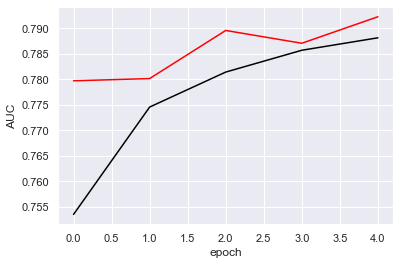

final training AUC: 0.788158
final development AUC: 0.792288


In [82]:
model = build_model_trial()
#display(tf.keras.utils.plot_model(model))
history = model.fit(
    x = {
        "product_code": df_train[["ProductCD"]],
        "card_company": df_train[["card4"]],
        "card_type": df_train[["card6"]],
        "currency_type": df_train[["Transaction_curr_type"]],
        "weekend": df_train[["weekend"]],
        "p_email_company": df_train[["P_emaildomain_company"]],
        "p_email_ext": df_train[["P_emaildomain_ext"]],
        "transaction_amt": df_train[["TransactionAmt_LOG"]],
        "m1": df_train[["M1"]], 
        "card_attribute1": df_train[["card3_proc"]],
        "card_attribute2": df_train[["card5_proc"]]
        },
    y = df_train[["isFraud"]],
    epochs = 5,
    batch_size = 128,
    validation_data = ({
        "product_code": df_dev[["ProductCD"]],
        "card_company": df_dev[["card4"]],
        "card_type": df_dev[["card6"]],
        "currency_type": df_dev[["Transaction_curr_type"]],
        "weekend": df_dev[["weekend"]],
        "p_email_company": df_dev[["P_emaildomain_company"]],
        "p_email_ext": df_dev[["P_emaildomain_ext"]],
        "transaction_amt": df_dev[["TransactionAmt_LOG"]],
        "m1": df_dev[["M1"]],
        "card_attribute1": df_dev[["card3_proc"]],
        "card_attribute2": df_dev[["card5_proc"]]
        }, df_dev[["isFraud"]]),
    verbose = 1 
    )

show_history(history)